### Diabetes Dataset Mega Case study

### Maroof Akhtar - 2159588

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\MAQ\Downloads\diabetes.csv")

In [3]:
#Below function lists the first 10 records of the dataset so we can get an idea
#of what kind of dataset are we dealing with. 
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
#Below we can see the type of data that each column has
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.info()
# we can see that there are 768 records, Also there are no NULL values in any of the columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()
# Now the below table describes or we can say summarise about the dataset.
#like mean values in each column, max values in each column

#OBSERVATION!!!!!

#in the min column, the values can't be 0 in case of like Blood Pressure, Glucose, skin thickness

#now we will replace these values to proceed further


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#Now we can see that there are some invalid values, thus, we need to clean the dataset and remove any duplicate values if any


In [8]:
df.shape

(768, 9)

In [9]:
df=df.drop_duplicates()

In [10]:
df.shape

(768, 9)

In [11]:
#Now we can conlude that there are no duplicate values as even after we dropped the duplicate values, the shape of the dataset remained same

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
#in above function we can clearly see that there are no null or missing values

In [14]:
#We saw above that few columns cannot have 0 values but they had. So now we will check how many values that they have that are 0

In [15]:
print('The number of 0 values in Blood Pressure are',df[df['BloodPressure']==0].shape[0])

The number of 0 values in Blood Pressure are 35


In [16]:
#now we will do the same for the rest of the columns
print('The number of 0 values in Skin Thickness are',df[df['SkinThickness']==0].shape[0])
print('The number of 0 values in BMI are',df[df['BMI']==0].shape[0])
print('The number of 0 values in Insulin are',df[df['Insulin']==0].shape[0])
print('The number of 0 values in Glucose are',df[df['Glucose']==0].shape[0])


The number of 0 values in Skin Thickness are 227
The number of 0 values in BMI are 11
The number of 0 values in Insulin are 374
The number of 0 values in Glucose are 5


In [17]:
#Now we have the identified the cells which have 0 values. 
#Next step is to replace the 0 values with a number greater than zero.

# Here we ar taking the median values of the column , and replace that with the zero values in that particular column

df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())
print('The number of 0 values in Glucose are',df[df['Glucose']==0].shape[0])


The number of 0 values in Glucose are 0


In [18]:
df['BMI'] = df['BMI'].replace(0,df['Glucose'].median())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())


In [19]:
print('The number of 0 values in Skin Thickness are',df[df['SkinThickness']==0].shape[0])
print('The number of 0 values in BMI are',df[df['BMI']==0].shape[0])
print('The number of 0 values in Insulin are',df[df['Insulin']==0].shape[0])
print('The number of 0 values in Glucose are',df[df['Glucose']==0].shape[0])


The number of 0 values in Skin Thickness are 0
The number of 0 values in BMI are 0
The number of 0 values in Insulin are 0
The number of 0 values in Glucose are 0


In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,33.668359,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,12.178062,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.825000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,117.000000,2.420000,81.000000,1.000000


#Great!!! now we can see that the min row has non-zero values. Pregnancies can be zero logically speaking



Lets move to Data Visualization

Now, we will plot the outcome and analyze the data set

C:\Users\MAQ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Negative (0):  500
Positive (1):  268


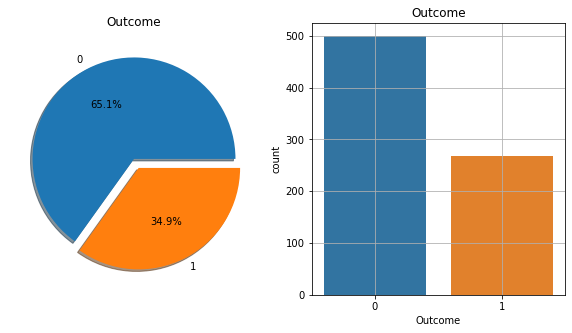

In [21]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')

#The outcome column has 0 and 1 values. below function is counts how many O and 1 are there.
# N = 0 and P = 1
N,P = df['Outcome'].value_counts()

print('Negative (0): ', N)
print('Positive (1): ', P)
plt.grid()
plt.show()

We have concluded that 500 people are non-diabetic and 268 are diabetic. 


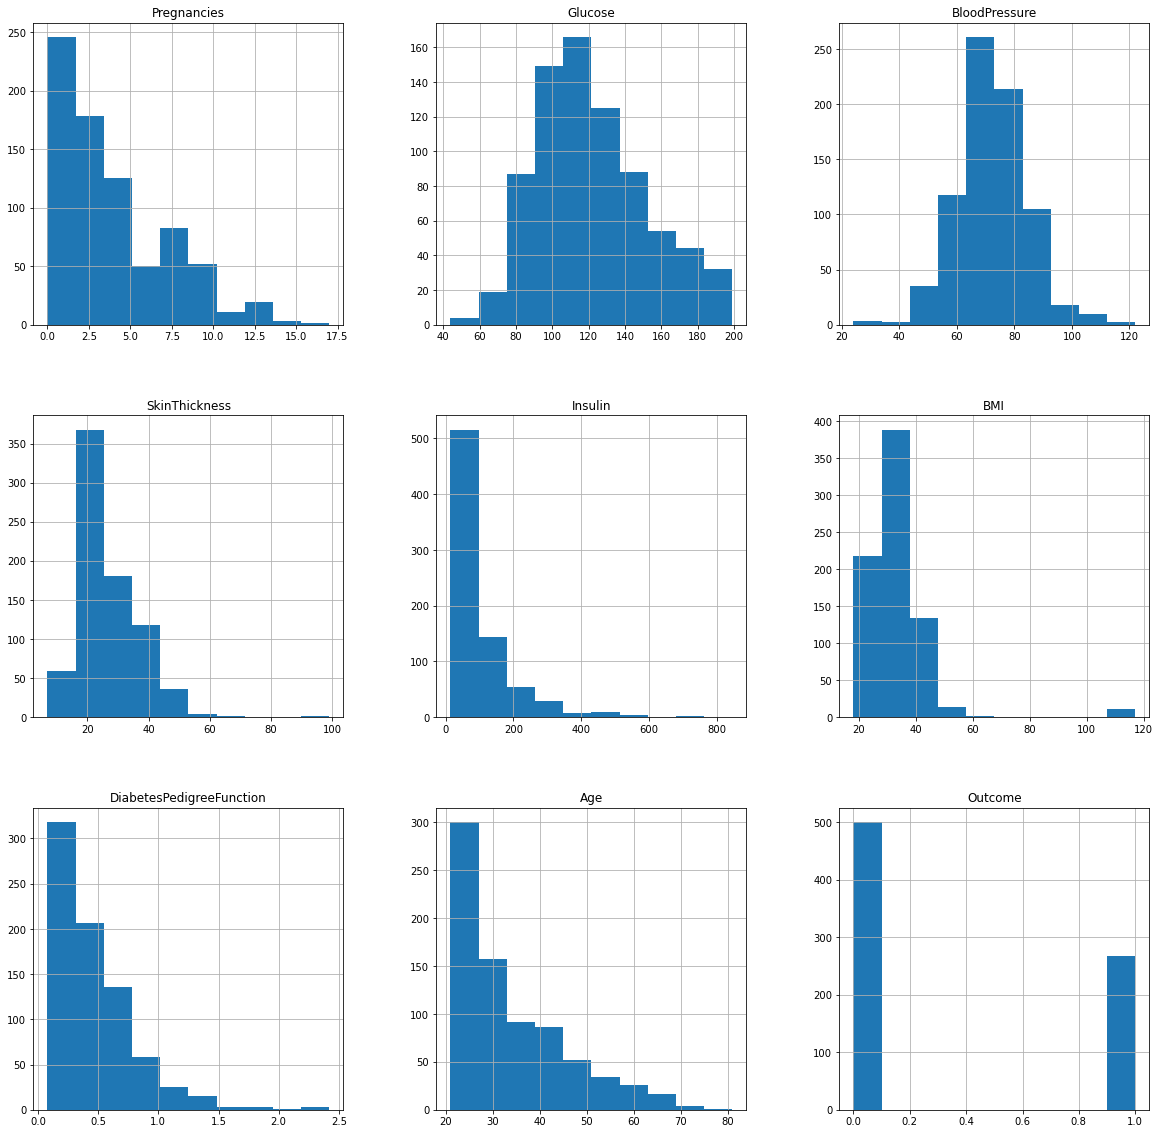

In [22]:
df.hist(bins=10,figsize=(20,20))
plt.show()

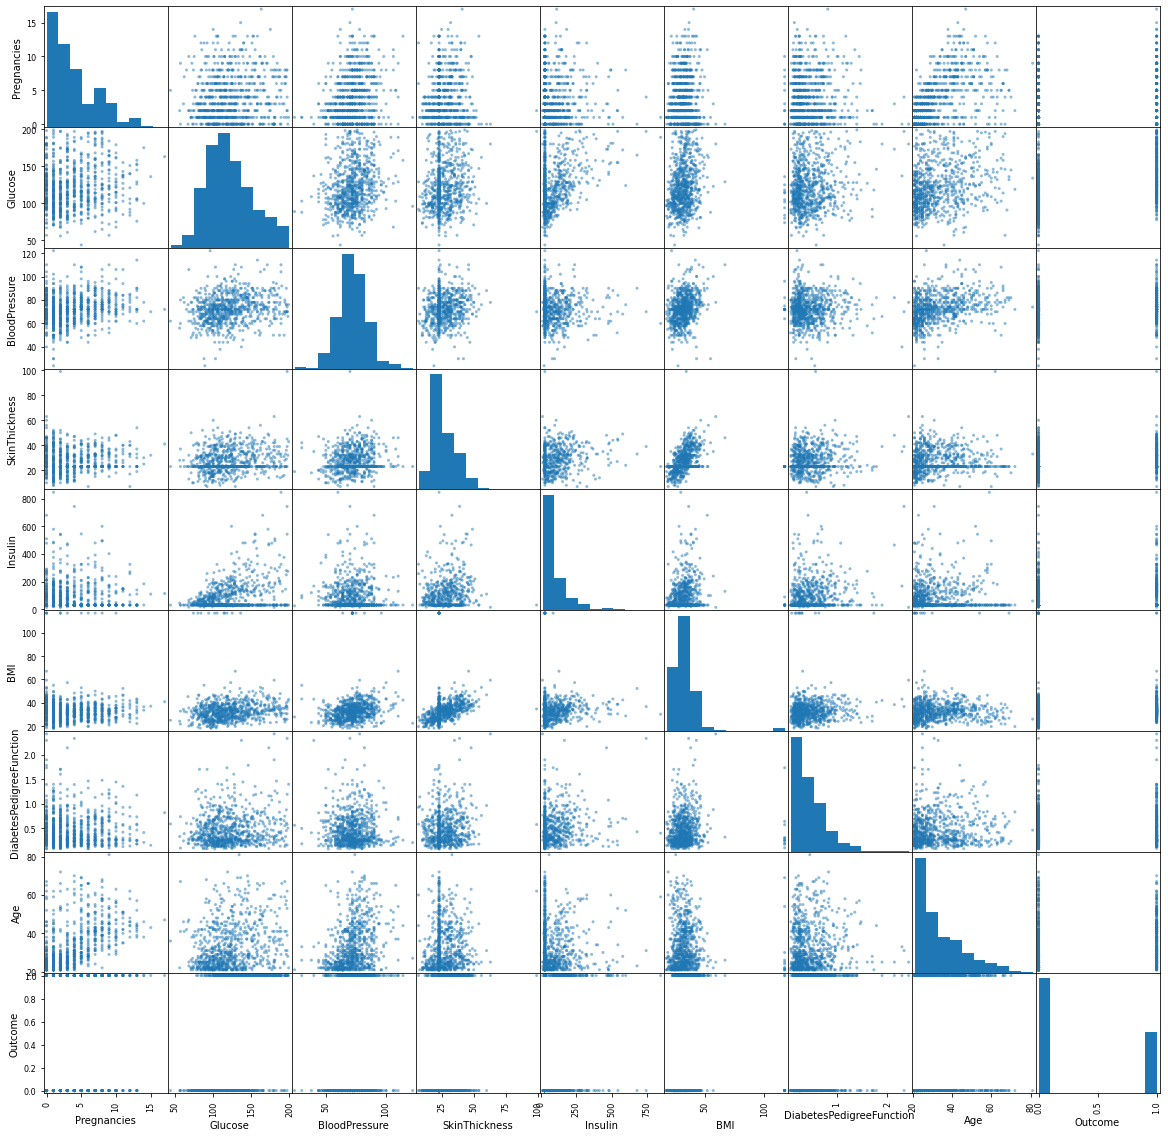

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize = (20,20));


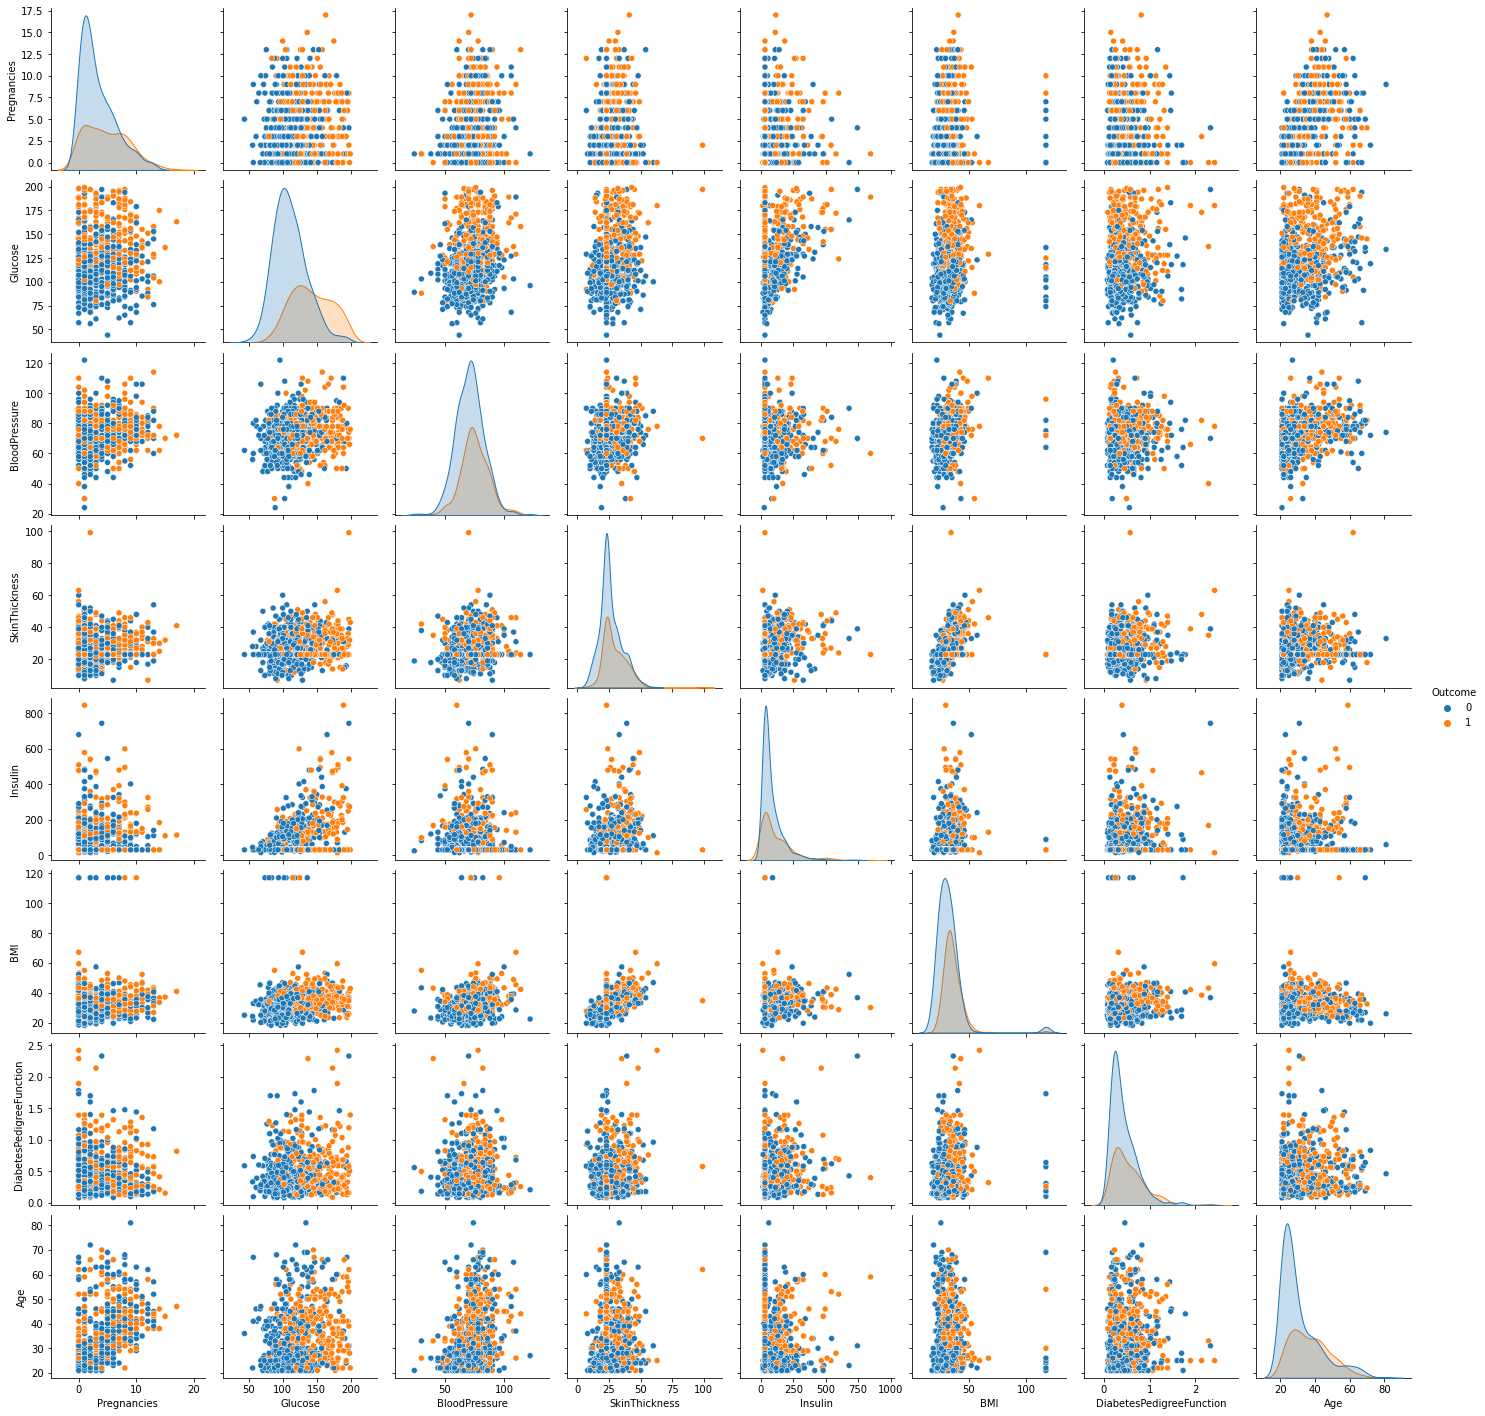

In [24]:
sns.pairplot(data = df, hue = 'Outcome')
plt.show()

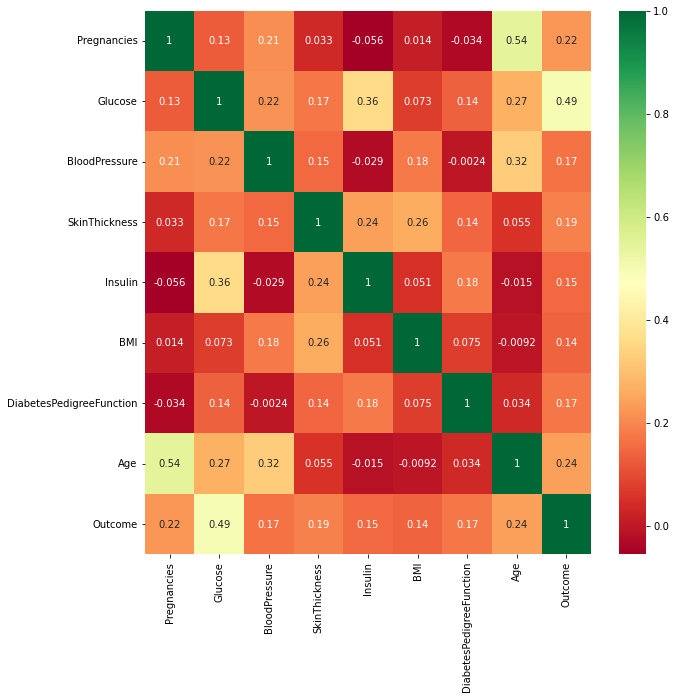

In [25]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [26]:
target_name = 'Outcome'

y = df[target_name]
x = df.drop(target_name, axis=1)


In [27]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [28]:
y.head()

#above is our targeted variable which is the Outcome

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [29]:
# 4 diff Scaling feature

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
SSX = scaler.transform(x)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(SSX,y,test_size=0.2, random_state=7)

#we can also apply 0.5, 0.8 and 0.4 to check

In [31]:
x_train.shape,y_train.shape

((614, 8), (614,))

In [32]:
x_test.shape,y_test.shape

((154, 8), (154,))

In [33]:
#logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [34]:
# KNeighborsClassifier (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier()
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [35]:
#Naive-Bayes Classifier

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [36]:
#Support Vector Machine

from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train, y_train)

SVC()

In [37]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)


DecisionTreeClassifier()

In [38]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [39]:
#Predictions  #Logictisc Regression

x_test.shape



(154, 8)

In [40]:
lr_pred=lr.predict(x_test)

In [41]:
lr_pred.shape

(154,)

In [42]:
#KNN

knn_pred=knn.predict(x_test)

In [43]:
knn_pred.shape

(154,)

In [44]:
#SVM

sv_pred=sv.predict(x_test)
sv_pred.shape

(154,)

In [45]:
#Decision Tree
dt_pred=dt.predict(x_test)
dt_pred.shape

(154,)

In [46]:
##Random Forest

rf_pred=rf.predict(x_test)
rf_pred.shape

(154,)

In [47]:
##Naivie Bayes

nb_pred=nb.predict(x_test)
nb_pred.shape

(154,)

In [48]:
#Model Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy of Logistic Regression", lr.score(x_train,y_train)*100)
print("Accuracy (Test) score of Logistic Regression", lr.score(x_test, y_test)*100)
print("Accuracy (Test) score of Logistic Regression", accuracy_score(y_test, lr_pred)*100)


Train Accuracy of Logistic Regression 76.2214983713355
Accuracy (Test) score of Logistic Regression 79.22077922077922
Accuracy (Test) score of Logistic Regression 79.22077922077922


In [49]:
 # Train score & Test score of KNN

print("Train Accuracy of KNN", knn.score (x_train,y_train)*100)
print("Accuracy (Test) score of KNN", knn.score (x_test, y_test)*100)
print("Accuracy score of KNN", accuracy_score (y_test, knn_pred)*100)

Train Accuracy of KNN 81.10749185667753
Accuracy (Test) score of KNN 71.42857142857143
Accuracy score of KNN 71.42857142857143


In [50]:
# Train score & Test score of Naive-Bayes

print("Train Accuracy of Naive Bayes", nb.score(x_train,y_train)*100) 
print("Accuracy (Test) score of Naive Bayes", nb.score (x_test, y_test)*100)
print("Accuracy score of Naive Bayes", accuracy_score (y_test,nb_pred)*100)


Train Accuracy of Naive Bayes 74.42996742671009
Accuracy (Test) score of Naive Bayes 75.97402597402598
Accuracy score of Naive Bayes 75.97402597402598


In [51]:
#SVM

print("Train Accuracy of SVM", sv.score(x_train,y_train)*100) 
print("Accuracy (Test) score of SVM", sv.score (x_test, y_test)*100)
print("Accuracy score of SVM", accuracy_score (y_test,sv_pred)*100)

Train Accuracy of SVM 80.78175895765473
Accuracy (Test) score of SVM 81.81818181818183
Accuracy score of SVM 81.81818181818183


In [52]:
#DEcision Tree

print("Train Accuracy of Decision Tree", dt.score(x_train,y_train)*100) 
print("Accuracy (Test) score of Decision Tree", dt.score (x_test, y_test)*100)
print("Accuracy score of Decision Tree", accuracy_score (y_test,dt_pred)*100)

Train Accuracy of Decision Tree 100.0
Accuracy (Test) score of Decision Tree 72.72727272727273
Accuracy score of Decision Tree 72.72727272727273


In [53]:
#Random Forest

print("Train Accuracy of Random Forest", rf.score(x_train,y_train)*100) 
print("Accuracy (Test) score of Random Forest", rf.score (x_test, y_test)*100)
print("Accuracy score of Random Forest", accuracy_score (y_test,rf_pred)*100)

Train Accuracy of Random Forest 100.0
Accuracy (Test) score of Random Forest 83.11688311688312
Accuracy score of Random Forest 83.11688311688312


Confusion Matrix

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

cm=confusion_matrix(y_test,lr_pred)
cm

array([[87, 10],
       [22, 35]], dtype=int64)

<AxesSubplot:>

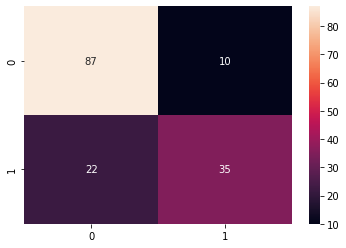

In [55]:
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt='d')

In [56]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]


In [57]:
TN,FP,FN,TP

(87, 10, 22, 35)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

from sklearn. metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, lr_pred)

print('TN- True Negative {}'.format(cm[0,0]))

print('FP False Positive {}'.format(cm[0,1]))

print('FN False Negative {}'.format(cm[1,0]))

print('TP - True Positive {}'.format(cm[1,1]))

print('Accuracy Rate: {}'.format(np.divide(np.sum( [cm [0,0], cm[1,1]]), np. sum(cm))*100)) 
print('Misclassification Rate: {}'.format(np.divide (np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN- True Negative 87
FP False Positive 10
FN False Negative 22
TP - True Positive 35
Accuracy Rate: 79.22077922077922
Misclassification Rate: 20.77922077922078


In [59]:
79.22077922077922+20.77922077922078

100.0

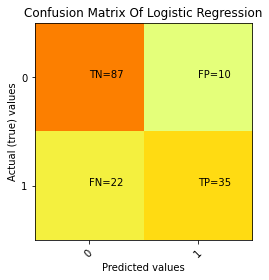

In [60]:
import matplotlib.pyplot as plt

plt.clf()

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)

classNames = ['0', '1']

plt.title('Confusion Matrix Of Logistic Regression') 

plt.ylabel('Actual (true) values')

plt.xlabel('Predicted values')

tick_marks = np.arange(len(classNames))

plt.xticks(tick_marks, classNames, rotation=45)

plt.yticks(tick_marks, classNames)

s = [['TN', 'FP'], ['FN', 'TP']]

for i in range(2):

     for j in range(2):

             plt.text(j,i, str(s[i][j])+"="+str(cm[i][j]))

plt.show()

In [61]:
pd.crosstab(y_test,lr_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,87,10,97
1,22,35,57
All,109,45,154


In [62]:
pd.crosstab(y_test,lr_pred, margins=False)

col_0,0,1
Outcome,,
0,87,10
1,22,35


In [63]:
pd.crosstab(y_test,lr_pred,rownames=['Actual Values'],colnames=['Predicted Values'], margins=True)

Predicted Values,0,1,All
Actual Values,,,
0,87,10,97
1,22,35,57
All,109,45,154


In [64]:
##Precision PPV Positive Predictive Values

In [65]:
TP,FP

(35, 10)

In [66]:
Precision=TP/(TP+FP)

In [67]:
Precision

0.7777777777777778

In [68]:
#Precision Score

precision_score = TP / float(TP + FP)*100
print('Precision Score : {0:0.4f}' .format(precision_score))

Precision Score : 77.7778


In [69]:
from sklearn.metrics import precision_score

print("precision Score is:", precision_score (y_test, lr_pred)*100)
print("Micro Average precision Score is:", precision_score (y_test, lr_pred, average="micro")*100)

print("Macro Average precision Score is:", precision_score (y_test, lr_pred, average='macro')*100)
print("Weighted Average precision Score is:", precision_score (y_test, lr_pred, average='weighted')*100)
print("precision Score on Non weighted score is:", precision_score (y_test, lr_pred, average=None)*100)

precision Score is: 77.77777777777779
Micro Average precision Score is: 79.22077922077922
Macro Average precision Score is: 78.79714576962283
Weighted Average precision Score is: 79.06191667659557
precision Score on Non weighted score is: [79.81651376 77.77777778]


In [70]:
print('Classification Report of Logistic Regression: \n' , classification_report(y_test,lr_pred,digits=4))

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0     0.7982    0.8969    0.8447        97
           1     0.7778    0.6140    0.6863        57

    accuracy                         0.7922       154
   macro avg     0.7880    0.7555    0.7655       154
weighted avg     0.7906    0.7922    0.7860       154



In [71]:
# True Positive Rate



In [72]:
recall_score = TP / float (TP + FN)*100 
print('recall_score',recall_score)

recall_score 61.40350877192983


In [73]:
TP,FN

(35, 22)

In [74]:
from sklearn.metrics import recall_score
print('Recall or Sensitivity_score :',recall_score (y_test,lr_pred)*100)

Recall or Sensitivity_score : 61.40350877192983


In [75]:
print("Micro Average Recall Score is:", recall_score (y_test,lr_pred, average='micro')*100) 
print("Macro Average Recall Score is:", recall_score (y_test, lr_pred, average='macro')*100)
print("Weighted Average Recall Score is:", recall_score (y_test, lr_pred, average='weighted')*100)
print("Recall Score on Non weighted score is: ", recall_score (y_test, lr_pred, average=None)*100)


Micro Average Recall Score is: 79.22077922077922
Macro Average Recall Score is: 75.54711521070718
Weighted Average Recall Score is: 79.22077922077922
Recall Score on Non weighted score is:  [89.69072165 61.40350877]


In [76]:
print('Classification Report of Logistic Regression: \n' , classification_report(y_test,lr_pred,digits=4))

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0     0.7982    0.8969    0.8447        97
           1     0.7778    0.6140    0.6863        57

    accuracy                         0.7922       154
   macro avg     0.7880    0.7555    0.7655       154
weighted avg     0.7906    0.7922    0.7860       154



In [77]:
#False POsitive Rate
FPR = FP / float (FP+ TN)*100

print('False Positive Rate: {0:0.4f}'.format(FPR))


False Positive Rate: 10.3093


In [78]:
FP,TN

(10, 87)

In [79]:
specificity = TN / (TN+FP)*100
print('Specificity : {0:0.4}' .format(FPR))

Specificity : 10.31


In [80]:
from sklearn.metrics import f1_score
print('Recall or Sensitivity_score :',f1_score (y_test,lr_pred)*100)

Recall or Sensitivity_score : 68.62745098039215


In [81]:
print("Micro Average Recall Score is:", f1_score (y_test,lr_pred, average='micro')*100) 
print("Macro Average Recall Score is:", f1_score (y_test, lr_pred, average='macro')*100)
print("Weighted Average Recall Score is:", f1_score (y_test, lr_pred, average='weighted')*100)
print("F1 Score on Non weighted score is: ", f1_score (y_test, lr_pred, average=None)*100)


Micro Average Recall Score is: 79.22077922077922
Macro Average Recall Score is: 76.54673519893393
Weighted Average Recall Score is: 78.60369213881492
F1 Score on Non weighted score is:  [84.46601942 68.62745098]


In [82]:
#Classification Report of Logistic Regression

from sklearn.metrics import classification_report
print('Classification Report of Logistic Regression: \n' , classification_report(y_test,lr_pred,digits=4))

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0     0.7982    0.8969    0.8447        97
           1     0.7778    0.6140    0.6863        57

    accuracy                         0.7922       154
   macro avg     0.7880    0.7555    0.7655       154
weighted avg     0.7906    0.7922    0.7860       154



In [83]:
#ROC Curve

auc = roc_auc_score(y_test,lr_pred)
print("ROC AUC score of the logistic regresssion is",auc)



ROC AUC score of the logistic regresssion is 0.7554711521070719


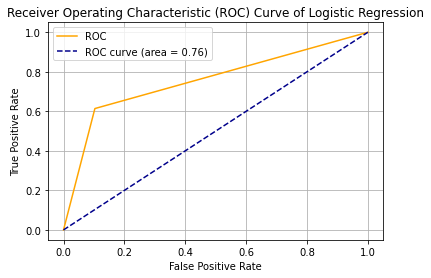

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, lr_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')

plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve of Logistic Regression')
plt.legend()

plt.grid()

plt.show()

In [85]:
## KNN, Confusion matrix and classification model analysis

<AxesSubplot:>

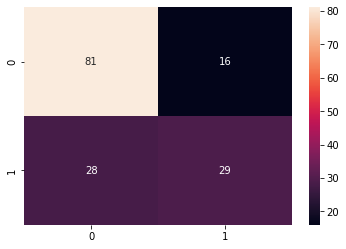

In [86]:
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True,fmt='d')

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

from sklearn. metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, knn_pred)

print('TN- True Negative {}'.format(cm[0,0]))

print('FP False Positive {}'.format(cm[0,1]))

print('FN False Negative {}'.format(cm[1,0]))

print('TP - True Positive {}'.format(cm[1,1]))

print('Accuracy Rate: {}'.format(np.divide(np.sum( [cm [0,0], cm[1,1]]), np. sum(cm))*100)) 
print('Misclassification Rate: {}'.format(np.divide (np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN- True Negative 81
FP False Positive 16
FN False Negative 28
TP - True Positive 29
Accuracy Rate: 71.42857142857143
Misclassification Rate: 28.57142857142857


In [88]:
print('Classification Report of KNN: \n' , classification_report(y_test,knn_pred,digits=4))

Classification Report of KNN: 
               precision    recall  f1-score   support

           0     0.7431    0.8351    0.7864        97
           1     0.6444    0.5088    0.5686        57

    accuracy                         0.7143       154
   macro avg     0.6938    0.6719    0.6775       154
weighted avg     0.7066    0.7143    0.7058       154



In [89]:
#ROC Area under the curve of KNN

auc = roc_auc_score(y_test,knn_pred)
print("ROC AUC score of the KNN is",auc)



ROC AUC score of the KNN is 0.671911738108157


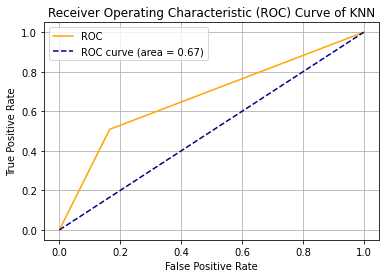

In [90]:
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')

plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve of KNN')
plt.legend()

plt.grid()

plt.show()

<AxesSubplot:>

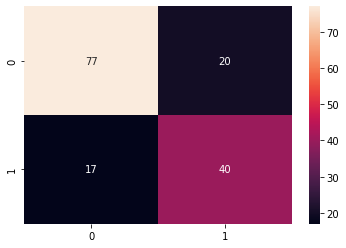

In [91]:
sns.heatmap(confusion_matrix(y_test,nb_pred),annot=True,fmt='d')

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

from sklearn. metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, nb_pred)

print('TN- True Negative {}'.format(cm[0,0]))

print('FP False Positive {}'.format(cm[0,1]))

print('FN False Negative {}'.format(cm[1,0]))

print('TP - True Positive {}'.format(cm[1,1]))

print('Accuracy Rate: {}'.format(np.divide(np.sum( [cm [0,0], cm[1,1]]), np. sum(cm))*100)) 
print('Misclassification Rate: {}'.format(np.divide (np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN- True Negative 77
FP False Positive 20
FN False Negative 17
TP - True Positive 40
Accuracy Rate: 75.97402597402598
Misclassification Rate: 24.025974025974026


In [93]:
## Naive Bayes, Confusion matrix and classification model analysis

In [94]:
print('Classification Report of Naive Bayes: \n' , classification_report(y_test,nb_pred,digits=4))

Classification Report of Naive Bayes: 
               precision    recall  f1-score   support

           0     0.8191    0.7938    0.8063        97
           1     0.6667    0.7018    0.6838        57

    accuracy                         0.7597       154
   macro avg     0.7429    0.7478    0.7450       154
weighted avg     0.7627    0.7597    0.7609       154



In [95]:
#ROC Area under the curve of Naive Bayes

auc = roc_auc_score(y_test,nb_pred)
print("ROC AUC score of the Naive Bayes is",auc)

ROC AUC score of the Naive Bayes is 0.7477844094773015


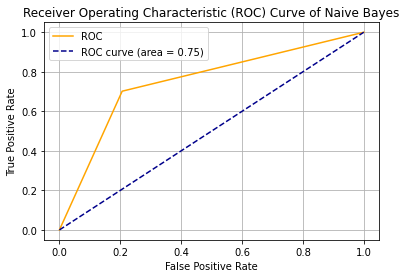

In [96]:
fpr, tpr, thresholds = roc_curve(y_test, nb_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')

plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve of Naive Bayes')
plt.legend()

plt.grid()

plt.show()

In [97]:
## Same with SVM

<AxesSubplot:>

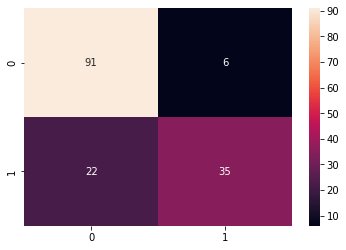

In [98]:
sns.heatmap(confusion_matrix(y_test,sv_pred),annot=True,fmt='d')

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

from sklearn. metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, sv_pred)

print('TN- True Negative {}'.format(cm[0,0]))

print('FP False Positive {}'.format(cm[0,1]))

print('FN False Negative {}'.format(cm[1,0]))

print('TP - True Positive {}'.format(cm[1,1]))

print('Accuracy Rate: {}'.format(np.divide(np.sum( [cm [0,0], cm[1,1]]), np. sum(cm))*100)) 
print('Misclassification Rate: {}'.format(np.divide (np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN- True Negative 91
FP False Positive 6
FN False Negative 22
TP - True Positive 35
Accuracy Rate: 81.81818181818183
Misclassification Rate: 18.181818181818183


In [100]:
print('Classification Report of SVM: \n' , classification_report(y_test,sv_pred,digits=4))

Classification Report of SVM: 
               precision    recall  f1-score   support

           0     0.8053    0.9381    0.8667        97
           1     0.8537    0.6140    0.7143        57

    accuracy                         0.8182       154
   macro avg     0.8295    0.7761    0.7905       154
weighted avg     0.8232    0.8182    0.8103       154



In [101]:
#ROC Area under the curve of SVM

auc = roc_auc_score(y_test,sv_pred)
print("ROC AUC score of the SVM is",auc)

ROC AUC score of the SVM is 0.7760897088081028


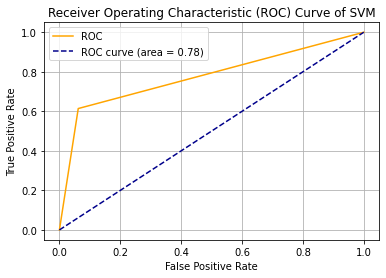

In [102]:
fpr, tpr, thresholds = roc_curve(y_test, sv_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')

plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve of SVM')
plt.legend()

plt.grid()

plt.show()

In [103]:
#Decision tree 

<AxesSubplot:>

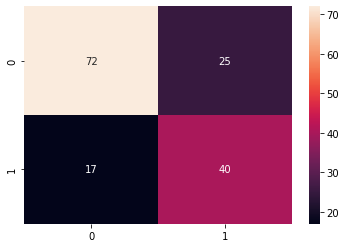

In [104]:
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True,fmt='d')

In [105]:
from sklearn.metrics import classification_report, confusion_matrix

from sklearn. metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, dt_pred)

print('TN- True Negative {}'.format(cm[0,0]))

print('FP False Positive {}'.format(cm[0,1]))

print('FN False Negative {}'.format(cm[1,0]))

print('TP - True Positive {}'.format(cm[1,1]))

print('Accuracy Rate: {}'.format(np.divide(np.sum( [cm [0,0], cm[1,1]]), np. sum(cm))*100)) 
print('Misclassification Rate: {}'.format(np.divide (np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN- True Negative 72
FP False Positive 25
FN False Negative 17
TP - True Positive 40
Accuracy Rate: 72.72727272727273
Misclassification Rate: 27.27272727272727


In [106]:
print('Classification Report of Decision Tree: \n' , classification_report(y_test,dt_pred,digits=4))

Classification Report of Decision Tree: 
               precision    recall  f1-score   support

           0     0.8090    0.7423    0.7742        97
           1     0.6154    0.7018    0.6557        57

    accuracy                         0.7273       154
   macro avg     0.7122    0.7220    0.7150       154
weighted avg     0.7373    0.7273    0.7303       154



In [107]:
#ROC Area under the curve of Decision Tree

auc = roc_auc_score(y_test,dt_pred)
print("ROC AUC score of the Decision Tree is",auc)

ROC AUC score of the Decision Tree is 0.7220112136010128


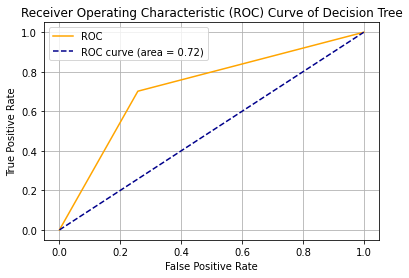

In [108]:
fpr, tpr, thresholds = roc_curve(y_test, dt_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')

plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve of Decision Tree')
plt.legend()

plt.grid()

plt.show()

In [109]:
# Random Forest

<AxesSubplot:>

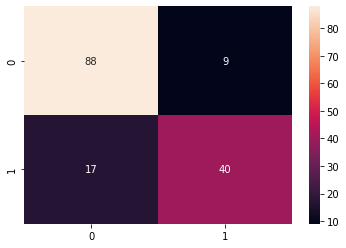

In [110]:
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt='d')

In [111]:
from sklearn.metrics import classification_report, confusion_matrix

from sklearn. metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, rf_pred)

print('TN- True Negative {}'.format(cm[0,0]))

print('FP False Positive {}'.format(cm[0,1]))

print('FN False Negative {}'.format(cm[1,0]))

print('TP - True Positive {}'.format(cm[1,1]))

print('Accuracy Rate: {}'.format(np.divide(np.sum( [cm [0,0], cm[1,1]]), np. sum(cm))*100)) 
print('Misclassification Rate: {}'.format(np.divide (np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN- True Negative 88
FP False Positive 9
FN False Negative 17
TP - True Positive 40
Accuracy Rate: 83.11688311688312
Misclassification Rate: 16.883116883116884


In [112]:
print('Classification Report of Random Forest: \n' , classification_report(y_test,rf_pred,digits=4))

Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0     0.8381    0.9072    0.8713        97
           1     0.8163    0.7018    0.7547        57

    accuracy                         0.8312       154
   macro avg     0.8272    0.8045    0.8130       154
weighted avg     0.8300    0.8312    0.8281       154



In [113]:
#ROC Area under the curve of Decision Tree

auc = roc_auc_score(y_test,rf_pred)
print("ROC AUC score of the Random Forest is",auc)

ROC AUC score of the Random Forest is 0.8044854404051365


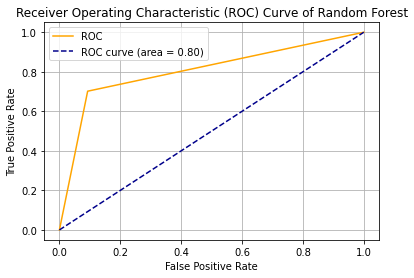

In [114]:
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')

plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve of Random Forest')
plt.legend()

plt.grid()

plt.show()

In [123]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

# Load the iris dataset
iris = load_iris()

# Create a logistic regression model
model = LogisticRegression()

# Create a 10-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform the cross-validation and get the scores
scores = cross_val_score(model, iris.data, iris.target, cv=kf)

# Print the average score
print("Average performance of logistic regression: {:.2f}".format(scores.mean()))


C:\Users\MAQ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MAQ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Average performance of logistic regression: 0.97


C:\Users\MAQ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MAQ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

In [116]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold

# Load the iris dataset
iris = load_iris()

# Create a Naive Bayes model
model = GaussianNB()

# Create a 10-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform the cross-validation and get the scores
scores = cross_val_score(model, iris.data, iris.target, cv=kf)

# Print the average score
print("Average performance of Naive Bayes: {:.2f}".format(scores.mean()))


Average performance of Naive Bayes: 0.96


In [117]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold

# Load the iris dataset
iris = load_iris()

# Create an SVM model
model = SVC(kernel='linear')

# Create a 10-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform the cross-validation and get the scores
scores = cross_val_score(model, iris.data, iris.target, cv=kf)

# Print the average score
print("Average performance of SVM: {:.2f}".format(scores.mean()))


Average performance of SVM: 0.97


In [118]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

# Load the iris dataset
iris = load_iris()

# Create a Decision Tree model
model = DecisionTreeClassifier()

# Create a 10-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform the cross-validation and get the scores
scores = cross_val_score(model, iris.data, iris.target, cv=kf)

# Print the average score
print("Average performance of Decision Tree: {:.2f}".format(scores.mean()))


Average performance of Decision Tree: 0.94


In [119]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

# Load the iris dataset
iris = load_iris()

# Create a Random Forest model
model = RandomForestClassifier()

# Create a 10-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform the cross-validation and get the scores
scores = cross_val_score(model, iris.data, iris.target, cv=kf)

# Print the average score
print("Average performance of Random Forest: {:.2f}".format(scores.mean()))


Average performance of Random Forest: 0.95


In [124]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

# Load the iris dataset
iris = load_iris()

# Create a KNN model
model = KNeighborsClassifier()

# Create a 10-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform the cross-validation and get the scores
scores = cross_val_score(model, iris.data, iris.target, cv=kf)

# Print the average score
print("Average performance of KNN: {:.2f}".format(scores.mean()))


Average performance of KNN: 0.97
